In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml 

!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml 

--2023-04-23 10:57:01--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml.1’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.01s   

2023-04-23 10:57:01 (26.1 MB/s) - ‘haarcascade_eye.xml.1’ saved [341406/341406]

--2023-04-23 10:57:01--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent,

In [4]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

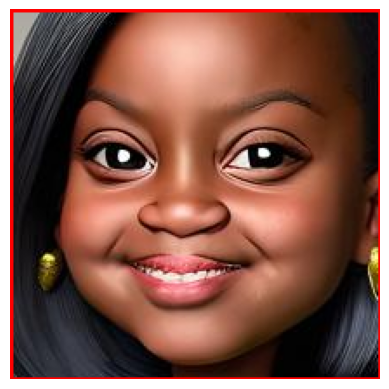

In [5]:
img =cv2.cvtColor(cv2.imread('/content/image.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3,2,flags=cv2.CASCADE_SCALE_IMAGE)
for (x,y,w,h) in faces:
  img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gr = gray[y:y+h, x:x+w]
  roi_clr = img[y:y+h, x:x+w]
plt.axis('off')
plt.imshow(roi_clr)

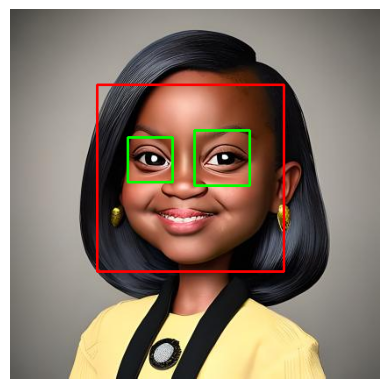

In [6]:
the_eyes = eye_cascade.detectMultiScale(roi_gr)
for (ex,ey,ew,eh) in the_eyes:
  cv2.rectangle(roi_clr,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.axis('off')
plt.imshow(img)